<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3 - KNN classification Lab

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

# Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
data = pd.read_csv(breast_cancer_csv,index_col='id')

In [3]:
data.shape

(569, 32)

In [4]:
data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [5]:
#column seems to be filled with blank values and would proceed to drop it
data.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
#Rename diagnosis to M=1, B=0
le=LabelEncoder()
data["diagnosis"]=le.fit_transform(data["diagnosis"])

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#  EDA 

Explore dataset. Clean data. Find correlation. 

In [8]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [9]:
#removing correlation above 0.9
corr=data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
new_data = data[selected_columns]

In [10]:
new_data.corr()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.358560,0.596534,0.696360,0.330499,-0.012838,0.567134,-0.008303,...,0.292999,0.253730,0.408042,-0.006522,0.077972,0.421465,0.590998,0.659610,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,-0.097317,...,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,0.386358,...,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
smoothness_mean,0.358560,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,...,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,...,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,...,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
symmetry_mean,0.330499,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,...,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
fractal_dimension_mean,-0.012838,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,...,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
radius_se,0.567134,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,...,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
texture_se,-0.008303,-0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,...,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.092439,-0.068956,-0.128215,-0.045655


# Set up the `diagnosis` variable as your target. How many classes are there?

In [11]:
# ANSWER
y = new_data['diagnosis']
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## What is the baseline accuracy?

In [12]:
# ANSWER
y.value_counts(normalize=True)

#

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

# Choose features to be your predictor variables and set up your X.

In [13]:
# ANSWER
#create a dataframe with all training data except the target column
X = new_data.drop(['diagnosis'], axis=1)

In [14]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
842517,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
84300903,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
84348301,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
84358402,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


# Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [15]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)

# fit on the unstandardized data:

knn.fit(X,y)


KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.score(X,y)

1.0

## Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [17]:
# ANSWER
# predict the response values for the observations in X ("test the model")
pred_y = knn.predict(X)

# store the predicted response values
df = pd.DataFrame(y)
df['Y Prediction'] = pred_y



In [18]:
df

,diagnosis,Y Prediction
id,,
842302,1,1
842517,1,1
84300903,1,1
84348301,1,1
84358402,1,1
...,...,...
926424,1,1
926682,1,1
926954,1,1


# Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [19]:
from sklearn.model_selection import train_test_split
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP 2: train the model on the training set (using K=1)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn.fit(X_train,y_train)

# STEP 3: test the model on the testing set, and check the accuracy
knn.score(X_test, y_test)

0.8947368421052632

# Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [20]:
len(X_train)

455

In [21]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = KNeighborsClassifier(n_neighbors = 455)
# Fit Train Data
knn.fit(X_train,y_train)
# Print accuracy_score
knn.score(X_test, y_test)

0.631578947368421

# Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [22]:
# ANSWER
# plot test accuracy by number of neighbors:

test_accuracy = []

for i in range(1,456):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    test_accuracy.append(knn.score(X_test, y_test))   

In [23]:
len(test_accuracy)

455

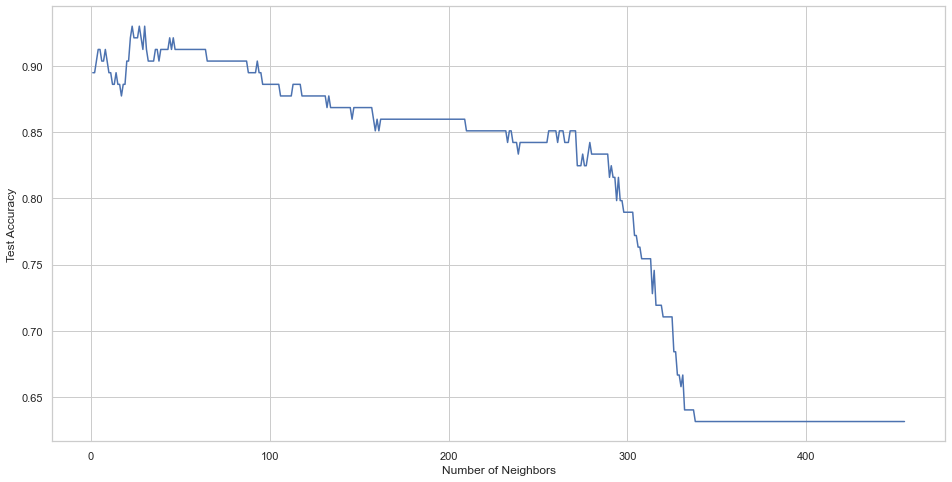

In [24]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
plt.plot(range(1, 456),test_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.show()

# Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [25]:
# ANSWER
from sklearn.model_selection import cross_val_score

CV_test_accuracy = []

for i in range(1,456):
    knn_cv = KNeighborsClassifier(n_neighbors = i)
    cv_scores = cross_val_score(knn_cv, X, y, cv=5)
    CV_test_accuracy.append(np.mean(cv_scores))   

In [26]:
len(CV_test_accuracy)

455

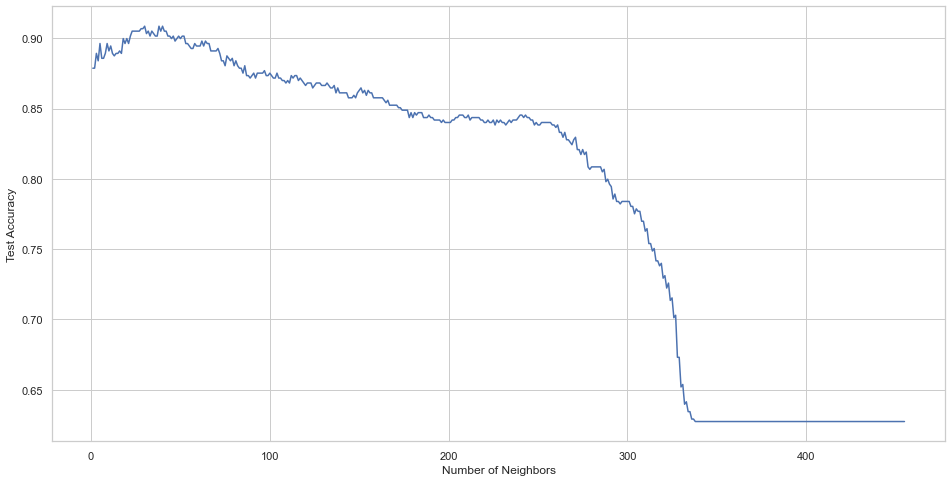

In [27]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
plt.plot(range(1, 456),CV_test_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.show()

# Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [28]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
X_std = scaler.fit_transform(X) 

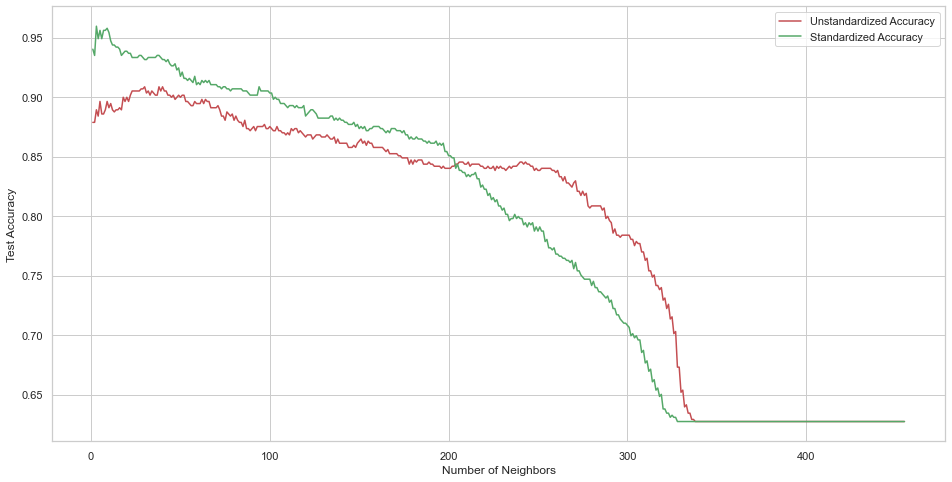

In [29]:
# ANSWER
# plot test accuracy by number of neighbors:
CV_test_accuracy_std = []

for i in range(1,456):
    knn_cv_std = KNeighborsClassifier(n_neighbors = i)
    cv_scores = cross_val_score(knn_cv_std, X_std, y, cv=5)
    CV_test_accuracy_std.append(np.mean(cv_scores))  
    
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
plt.plot(range(1, 456),CV_test_accuracy,label='Unstandardized Accuracy', color='r')
plt.plot(range(1, 456),CV_test_accuracy_std,label='Standardized Accuracy', color='g')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()




Model with Standardized predictor variables have higher scores compared to unstandardized features, when K is 1 to 200.


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

© 2019 Institute of Data